<a href="https://colab.research.google.com/github/Brayanjurado1325/AnalisisTemp/blob/main/An%C3%A1lisis_Data_temperatura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Cargar Librerias

In [ ]:
import pandas as pd
from datetime import time
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib.pyplot as plot


from google.colab import drive
drive.mount('/content/drive')

orignPath = "/content/drive/MyDrive/Datos Tempetura /"
DATA_DIR = "/content/drive/MyDrive/Datos Tempetura /"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Leer Data 

In [ ]:
direccion = '/content/drive/MyDrive/Datos Tempetura /Data dia 5.xlsx'
df = pd.read_excel(direccion)
df = df.dropna()  #Elimina NAN
df

,Fecha,Dia,Variedad,Trat,rep,Parcela,Hora,Inf,Med,Sup,PanTemp,Temp,Hum
5,2022-09-16,3,FED 50 BRAT,Control,1,38,18,21.2,21.8,22.0,21.666667,23.500,67.000
6,2022-09-16,3,FED 50 BRAT,Control,1,38,18,21.7,22.2,22.1,22.000000,23.500,67.000
7,2022-09-16,3,FED 50 BRAT,Control,1,38,18,21.9,21.9,22.0,21.933333,23.500,67.000
8,2022-09-16,3,FED 50 BRAT,Control,1,38,18,21.5,22.6,22.7,22.266667,23.500,67.000
9,2022-09-16,3,FED 50 BRAT,Control,2,86,18,21.6,21.5,21.6,21.566667,23.500,67.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327,2022-09-16,3,N22,Estrés,1,173,6,25.1,25.1,25.3,25.166667,22.553,90.304
332,2022-09-16,3,N22,Estrés,3,256,6,25.0,24.4,24.3,24.566667,22.553,90.304
333,2022-09-16,3,N22,Estrés,3,256,6,24.4,24.4,24.2,24.333333,22.553,90.304
334,2022-09-16,3,N22,Estrés,3,256,6,24.9,25.1,25.1,25.033333,22.553,90.304


## Matriz de correlacion

In [ ]:
corr_matrix = df.corr(method='pearson')
corr_matrix



,Dia,rep,Parcela,Hora,Inf,Med,Sup,PanTemp,Temp,Hum
Dia,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rep,NaN,1.000000,0.457591,-0.008426,0.011504,0.005980,0.006777,0.008104,-0.012018,0.053147
Parcela,NaN,0.457591,1.000000,-0.007513,0.835773,0.798370,0.823701,0.826691,0.754659,0.501472
Hora,NaN,-0.008426,-0.007513,1.000000,0.256574,0.253458,0.280498,0.266098,0.320036,-0.567248
Inf,NaN,0.011504,0.835773,0.256574,1.000000,0.960320,0.994350,0.993878,0.941825,0.283482
Med,NaN,0.005980,0.798370,0.253458,0.960320,1.000000,0.962434,0.983660,0.910818,0.235179
Sup,NaN,0.006777,0.823701,0.280498,0.994350,0.962434,1.000000,0.994697,0.941874,0.251648
PanTemp,NaN,0.008104,0.826691,0.266098,0.993878,0.983660,0.994697,1.000000,0.940074,0.258719
Temp,NaN,-0.012018,0.754659,0.320036,0.941825,0.910818,0.941874,0.940074,1.000000,0.206643
Hum,NaN,0.053147,0.501472,-0.567248,0.283482,0.235179,0.251648,0.258719,0.206643,1.000000


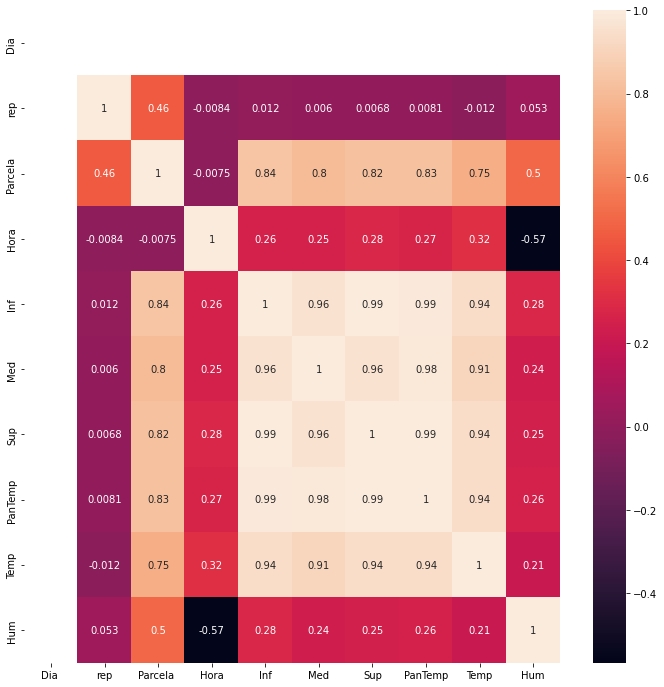

In [ ]:
corr_df = df.corr(method='pearson')


plt.figure(figsize=(12, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

## Filtro Para separar datos por variedad y tratamiento

In [ ]:
# Sacar datos de FEd control
df_Fed_control = df[(df['Variedad '] == 'FED 50 BRAT') & (df['Trat'] == 'Control ')]

FC_18 = df_Fed_control[(df['Hora'] == 18)].loc[:,'PanTemp']
FC_20 = df_Fed_control[(df['Hora'] == 20)].loc[:,'PanTemp']
FC_22 = df_Fed_control[(df['Hora'] == 22)].loc[:,'PanTemp']
FC_0 = df_Fed_control[(df['Hora'] == 0)].loc[:,'PanTemp']
FC_2 = df_Fed_control[(df['Hora'] == 2)].loc[:,'PanTemp']
FC_4 = df_Fed_control[(df['Hora'] == 4)].loc[:,'PanTemp']
FC_6 = df_Fed_control[(df['Hora'] == 6)].loc[:,'PanTemp']


data_Fed_control = pd.DataFrame({"6:00 PM": FC_18, "8:00 PM": FC_20, "10:00 PM": FC_22, "12:00 AM": FC_0, "2:00 AM": FC_2, "4:00 AM": FC_4, "6:00 AM": FC_6})

# Sacar datos de FEd Estres
df_Fed_Estres= df[(df['Variedad '] == 'FED 50 BRAT') & (df['Trat'] == 'Estrés ')]

FE_18 = df_Fed_Estres[(df['Hora'] == 18)].loc[:,'PanTemp']
FE_20 = df_Fed_Estres[(df['Hora'] == 20)].loc[:,'PanTemp']
FE_22 = df_Fed_Estres[(df['Hora'] == 22)].loc[:,'PanTemp']
FE_0 = df_Fed_Estres[(df['Hora'] == 0)].loc[:,'PanTemp']
FE_2 = df_Fed_Estres[(df['Hora'] == 2)].loc[:,'PanTemp']
FE_4 = df_Fed_Estres[(df['Hora'] == 4)].loc[:,'PanTemp']
FE_6 = df_Fed_Estres[(df['Hora'] == 6)].loc[:,'PanTemp']


data_Fed_Estres = pd.DataFrame({"6:00 PM": FE_18, "8:00 PM": FE_20, "10:00 PM": FE_22, "12:00 AM": FE_0, "2:00 AM": FE_2, "4:00 AM": FE_4, "6:00 AM": FE_6})


<ipython-input-5-bdb44cb925d4>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FC_18 = df_Fed_control[(df['Hora'] == 18)].loc[:,'PanTemp']
<ipython-input-5-bdb44cb925d4>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FC_20 = df_Fed_control[(df['Hora'] == 20)].loc[:,'PanTemp']
<ipython-input-5-bdb44cb925d4>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FC_22 = df_Fed_control[(df['Hora'] == 22)].loc[:,'PanTemp']
<ipython-input-5-bdb44cb925d4>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FC_0 = df_Fed_control[(df['Hora'] == 0)].loc[:,'PanTemp']
<ipython-input-5-bdb44cb925d4>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FC_2 = df_Fed_control[(df['Hora'] == 2)].loc[:,'PanTemp']
<ipython-input-5-bdb44cb925d4>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  FC_4 = df_Fed_control[(df['Hora'

In [ ]:
# Sacar datos de n22 control
df_N22_control = df[(df['Variedad '] == 'N22') & (df['Trat'] == 'Control ')]

NC_18 = df_N22_control[(df['Hora'] == 18)].loc[:,'PanTemp']
NC_20 = df_N22_control[(df['Hora'] == 20)].loc[:,'PanTemp']
NC_22 = df_N22_control[(df['Hora'] == 22)].loc[:,'PanTemp']
NC_0 = df_N22_control[(df['Hora'] == 0)].loc[:,'PanTemp']
NC_2 = df_N22_control[(df['Hora'] == 2)].loc[:,'PanTemp']
NC_4 = df_N22_control[(df['Hora'] == 4)].loc[:,'PanTemp']
NC_6 = df_N22_control[(df['Hora'] == 6)].loc[:,'PanTemp']


data_N22_control = pd.DataFrame({"6:00 PM": NC_18, "8:00 PM": NC_20, "10:00 PM": NC_22, "12:00 AM": NC_0, "2:00 AM": NC_2, "4:00 AM": NC_4, "6:00 AM": NC_6})

# Sacar datos de N22 Estres
df_N22_Estres= df[(df['Variedad '] == 'N22') & (df['Trat'] == 'Estrés ')]

NE_18 = df_N22_Estres[(df['Hora'] == 18)].loc[:,'PanTemp']
NE_20 = df_N22_Estres[(df['Hora'] == 20)].loc[:,'PanTemp']
NE_22 = df_N22_Estres[(df['Hora'] == 22)].loc[:,'PanTemp']
NE_0 = df_N22_Estres[(df['Hora'] == 0)].loc[:,'PanTemp']
NE_2 = df_N22_Estres[(df['Hora'] == 2)].loc[:,'PanTemp']
NE_4 = df_N22_Estres[(df['Hora'] == 4)].loc[:,'PanTemp']
NE_6 = df_N22_Estres[(df['Hora'] == 6)].loc[:,'PanTemp']


data_N22_Estres = pd.DataFrame({"6:00 PM": NE_18, "8:00 PM": NE_20, "10:00 PM": NE_22, "12:00 AM": NE_0, "2:00 AM": NE_2, "4:00 AM": NE_4, "6:00 AM": NE_6})

<ipython-input-6-fc9e28bcb621>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NC_18 = df_N22_control[(df['Hora'] == 18)].loc[:,'PanTemp']
<ipython-input-6-fc9e28bcb621>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NC_20 = df_N22_control[(df['Hora'] == 20)].loc[:,'PanTemp']
<ipython-input-6-fc9e28bcb621>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NC_22 = df_N22_control[(df['Hora'] == 22)].loc[:,'PanTemp']
<ipython-input-6-fc9e28bcb621>:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NC_0 = df_N22_control[(df['Hora'] == 0)].loc[:,'PanTemp']
<ipython-input-6-fc9e28bcb621>:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NC_2 = df_N22_control[(df['Hora'] == 2)].loc[:,'PanTemp']
<ipython-input-6-fc9e28bcb621>:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  NC_4 = df_N22_control[(df['Hora'

## Grafica de Caja

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


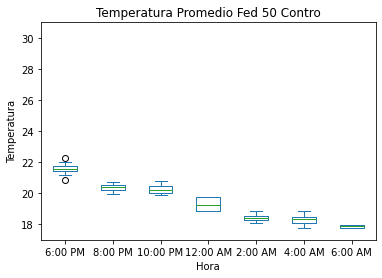

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


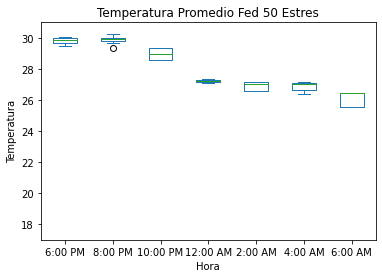

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


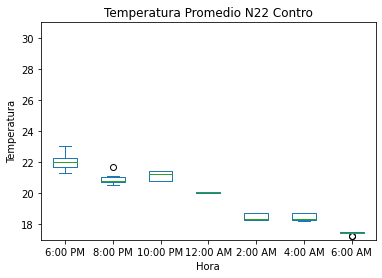

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


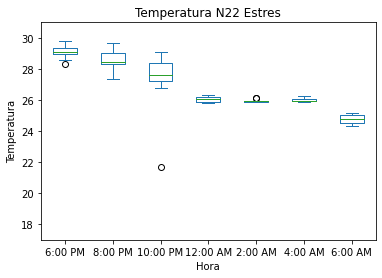

In [ ]:
# Plot the dataframe
ax = data_Fed_control[['6:00 PM','8:00 PM', '10:00 PM','12:00 AM','2:00 AM','4:00 AM','6:00 AM',]].plot(kind='box', title='Temperatura Promedio Fed 50 Contro');
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.ylim(17,31)
plt.show()
print("\n \n \n")
aX = data_Fed_Estres[['6:00 PM','8:00 PM', '10:00 PM','12:00 AM','2:00 AM','4:00 AM','6:00 AM',]].plot(kind='box', title='Temperatura Promedio Fed 50 Estres');
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.ylim(17,31)
plt.show()
print("\n \n \n")
ax = data_N22_control[['6:00 PM','8:00 PM', '10:00 PM','12:00 AM','2:00 AM','4:00 AM','6:00 AM',]].plot(kind='box', title='Temperatura Promedio N22 Contro');
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.ylim(17,31)
plt.show()
print("\n \n \n")
aX = data_N22_Estres[['6:00 PM','8:00 PM', '10:00 PM','12:00 AM','2:00 AM','4:00 AM','6:00 AM',]].plot(kind='box', title='Temperatura N22 Estres');
# Display the plot
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.ylim(17,31)
plt.show()

## Crear Dataframe con los promedio 

In [ ]:
df_Fed_control_Media = df[(df['Variedad '] == '0')];
df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 18)].mean()],ignore_index=True);
df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 20)].mean()],ignore_index=True);
df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 22)].mean()],ignore_index=True);
df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 0)].mean()],ignore_index=True);
df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 2)].mean()],ignore_index=True);
df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 4)].mean()],ignore_index=True);
df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 6)].mean()],ignore_index=True);

df_Fed_Estres_Media = df[(df['Variedad '] == '0')];
df_Fed_Estres_Media= df_Fed_Estres_Media.append([df_Fed_Estres[(df['Hora'] == 18)].mean()],ignore_index=True);
df_Fed_Estres_Media= df_Fed_Estres_Media.append([df_Fed_Estres[(df['Hora'] == 20)].mean()],ignore_index=True);
df_Fed_Estres_Media= df_Fed_Estres_Media.append([df_Fed_Estres[(df['Hora'] == 22)].mean()],ignore_index=True);
df_Fed_Estres_Media= df_Fed_Estres_Media.append([df_Fed_Estres[(df['Hora'] == 0)].mean()],ignore_index=True);
df_Fed_Estres_Media= df_Fed_Estres_Media.append([df_Fed_Estres[(df['Hora'] == 2)].mean()],ignore_index=True);
df_Fed_Estres_Media= df_Fed_Estres_Media.append([df_Fed_Estres[(df['Hora'] == 4)].mean()],ignore_index=True);
df_Fed_Estres_Media= df_Fed_Estres_Media.append([df_Fed_Estres[(df['Hora'] == 6)].mean()],ignore_index=True);

df_N22_control_Media = df[(df['Variedad '] == '0')];
df_N22_control_Media= df_N22_control_Media.append([df_N22_control[(df['Hora'] == 18)].mean()],ignore_index=True);
df_N22_control_Media= df_N22_control_Media.append([df_N22_control[(df['Hora'] == 20)].mean()],ignore_index=True);
df_N22_control_Media= df_N22_control_Media.append([df_N22_control[(df['Hora'] == 22)].mean()],ignore_index=True);
df_N22_control_Media= df_N22_control_Media.append([df_N22_control[(df['Hora'] == 0)].mean()],ignore_index=True);
df_N22_control_Media= df_N22_control_Media.append([df_N22_control[(df['Hora'] == 2)].mean()],ignore_index=True);
df_N22_control_Media= df_N22_control_Media.append([df_N22_control[(df['Hora'] == 4)].mean()],ignore_index=True);
df_N22_control_Media= df_N22_control_Media.append([df_N22_control[(df['Hora'] == 6)].mean()],ignore_index=True);


df_N22_Estres_Media = df[(df['Variedad '] == '0')];
df_N22_Estres_Media= df_N22_Estres_Media.append([df_N22_Estres[(df['Hora'] == 18)].mean()],ignore_index=True);
df_N22_Estres_Media= df_N22_Estres_Media.append([df_N22_Estres[(df['Hora'] == 20)].mean()],ignore_index=True);
df_N22_Estres_Media= df_N22_Estres_Media.append([df_N22_Estres[(df['Hora'] == 22)].mean()],ignore_index=True);
df_N22_Estres_Media= df_N22_Estres_Media.append([df_N22_Estres[(df['Hora'] == 0)].mean()],ignore_index=True);
df_N22_Estres_Media= df_N22_Estres_Media.append([df_N22_Estres[(df['Hora'] == 2)].mean()],ignore_index=True);
df_N22_Estres_Media= df_N22_Estres_Media.append([df_N22_Estres[(df['Hora'] == 4)].mean()],ignore_index=True);
df_N22_Estres_Media= df_N22_Estres_Media.append([df_N22_Estres[(df['Hora'] == 6)].mean()],ignore_index=True);



<ipython-input-8-3da59d4e0d06>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 18)].mean()],ignore_index=True);
<ipython-input-8-3da59d4e0d06>:2: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 18)].mean()],ignore_index=True);
<ipython-input-8-3da59d4e0d06>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_Fed_control_Media= df_Fed_control_Media.append([df_Fed_control[(df['Hora'] == 18)].mean()],ignore_index=True);
<ipython-input-8-3da59d4e0d06>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df_F

## Graficar Promedios 

In [ ]:
df_Fed_control_Media

,Fecha,Dia,Variedad,Trat,rep,Parcela,Hora,Inf,Med,Sup,PanTemp,Temp,Hum
0,NaN,3.0,NaN,NaN,2.00,79.333333,18.0,21.416667,21.625000,21.666667,21.569444,23.50,67.000
1,NaN,3.0,NaN,NaN,2.00,79.333333,20.0,20.283333,20.366667,20.525000,20.391667,22.60,67.400
2,NaN,3.0,NaN,NaN,2.00,79.333333,22.0,20.225000,20.225000,20.350000,20.266667,23.97,79.630
3,NaN,3.0,NaN,NaN,2.00,79.333333,0.0,19.333333,19.200000,19.333333,19.288889,20.80,79.200
4,NaN,3.0,NaN,NaN,2.00,79.333333,2.0,18.425000,18.450000,18.450000,18.441667,20.45,81.083
5,NaN,3.0,NaN,NaN,2.00,79.333333,4.0,18.291667,18.316667,18.275000,18.294444,19.79,85.600
6,NaN,3.0,NaN,NaN,2.25,90.500000,6.0,17.862500,17.687500,17.975000,17.841667,20.11,88.250


### Promedio de temperatura 

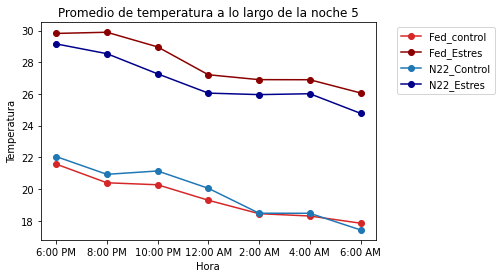

In [ ]:
df_Fed_control_Media
df_Fed_Estres_Media
df_N22_control_Media
df_N22_Estres_Media



fig, ax = plt.subplots()
dias = ['6:00 PM', '8:00 PM', '10:00 PM', '12:00 AM', '2:00 AM', '4:00 AM', '6:00 AM']
Datos_fed = {'Fed_control':df_Fed_control_Media['PanTemp'], 'Fed_Estres':df_Fed_Estres_Media['PanTemp']}
Datos_N22 = {'N22_Control':df_N22_control_Media['PanTemp'], 'N22_Estres':df_N22_Estres_Media['PanTemp']}
Datos_amb = {'Temp_Control':df_N22_control_Media['Temp'], 'Temp_Estres':df_N22_Estres_Media['Temp']}
ax.plot(dias, Datos_fed['Fed_control'], color = 'tab:red',label= 'Fed_control', marker = 'o')
ax.plot(dias, Datos_fed['Fed_Estres'], color = 'darkred', label= 'Fed_Estres', marker = 'o')
ax.plot(dias, Datos_N22['N22_Control'], color = 'tab:blue',label= 'N22_Control', marker = 'o')
ax.plot(dias, Datos_N22['N22_Estres'], color = 'darkblue', label= 'N22_Estres', marker = 'o')
#ax.plot(dias, Datos_amb['Temp_Control'], color = 'yellow',label= 'Amb_Control', marker = 'o')
#ax.plot(dias, Datos_amb['Temp_Estres'], color = 'yellowgreen', label= 'Amb_Estres', marker = 'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Promedio de temperatura a lo largo de la noche 5')
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.show()


### Comparacion de 3 partes de la panicula  

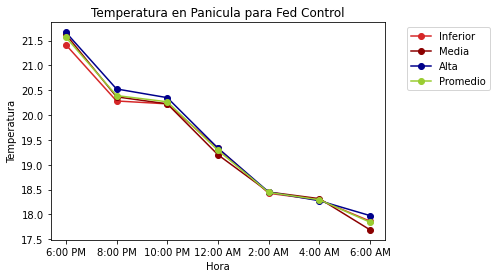

In [ ]:
fig, ax = plt.subplots()
dias = ['6:00 PM', '8:00 PM', '10:00 PM', '12:00 AM', '2:00 AM', '4:00 AM', '6:00 AM']
FED_3_CTRL = {'Inf':df_Fed_control_Media['Inf'], 'Med':df_Fed_control_Media['Med'],'Sup':df_Fed_control_Media['Sup'], 'Prom':df_Fed_control_Media['PanTemp']}

ax.plot(dias, FED_3_CTRL['Inf'], color = 'tab:red',label= 'Inferior', marker = 'o')
ax.plot(dias, FED_3_CTRL['Med'], color = 'darkred', label= 'Media', marker = 'o')
ax.plot(dias, FED_3_CTRL['Sup'], color = 'darkblue', label= 'Alta', marker = 'o')
ax.plot(dias, FED_3_CTRL['Prom'], color = 'yellowgreen', label= 'Promedio', marker = 'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Temperatura en Panicula para Fed Control')
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.show()

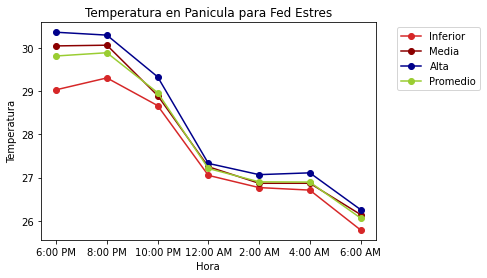

In [ ]:
fig, ax = plt.subplots()
dias = ['6:00 PM', '8:00 PM', '10:00 PM', '12:00 AM', '2:00 AM', '4:00 AM', '6:00 AM']
FED_3_EST = {'Inf':df_Fed_Estres_Media['Inf'], 'Med':df_Fed_Estres_Media['Med'],'Sup':df_Fed_Estres_Media['Sup'], 'Prom':df_Fed_Estres_Media['PanTemp']}

ax.plot(dias, FED_3_EST['Inf'], color = 'tab:red',label= 'Inferior', marker = 'o')
ax.plot(dias, FED_3_EST['Med'], color = 'darkred', label= 'Media', marker = 'o')
ax.plot(dias, FED_3_EST['Sup'], color = 'darkblue', label= 'Alta', marker = 'o')
ax.plot(dias, FED_3_EST['Prom'], color = 'yellowgreen', label= 'Promedio', marker = 'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Temperatura en Panicula para Fed Estres')
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.show()

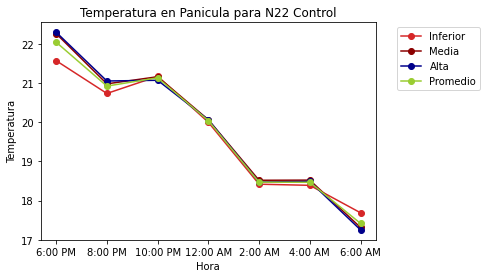

In [ ]:
fig, ax = plt.subplots()
dias = ['6:00 PM', '8:00 PM', '10:00 PM', '12:00 AM', '2:00 AM', '4:00 AM', '6:00 AM']
N22_3_CTRL = {'Inf':df_N22_control_Media['Inf'], 'Med':df_N22_control_Media['Med'],'Sup':df_N22_control_Media['Sup'], 'Prom':df_N22_control_Media['PanTemp']}

ax.plot(dias, N22_3_CTRL['Inf'], color = 'tab:red',label= 'Inferior', marker = 'o')
ax.plot(dias, N22_3_CTRL['Med'], color = 'darkred', label= 'Media', marker = 'o')
ax.plot(dias, N22_3_CTRL['Sup'], color = 'darkblue', label= 'Alta', marker = 'o')
ax.plot(dias, N22_3_CTRL['Prom'], color = 'yellowgreen', label= 'Promedio', marker = 'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Temperatura en Panicula para N22 Control')
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.show()

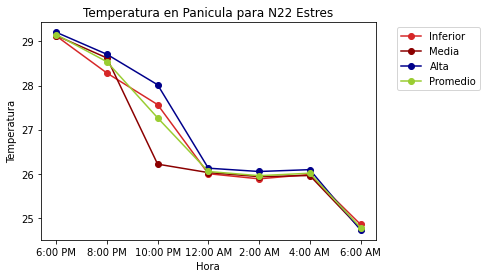

In [ ]:
fig, ax = plt.subplots()
dias = ['6:00 PM', '8:00 PM', '10:00 PM', '12:00 AM', '2:00 AM', '4:00 AM', '6:00 AM']
N22_3_EST = {'Inf':df_N22_Estres_Media['Inf'], 'Med':df_N22_Estres_Media['Med'],'Sup':df_N22_Estres_Media['Sup'], 'Prom':df_N22_Estres_Media['PanTemp']}

ax.plot(dias, N22_3_EST['Inf'], color = 'tab:red',label= 'Inferior', marker = 'o')
ax.plot(dias, N22_3_EST['Med'], color = 'darkred', label= 'Media', marker = 'o')
ax.plot(dias, N22_3_EST['Sup'], color = 'darkblue', label= 'Alta', marker = 'o')
ax.plot(dias, N22_3_EST['Prom'], color = 'yellowgreen', label= 'Promedio', marker = 'o')
ax.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Temperatura en Panicula para N22 Estres')
plt.xlabel('Hora')
plt.ylabel('Temperatura')
plt.show()